# Capstone Project Analysis

***

## Project Description

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| satisfaction_level |	The employee’s self-reported satisfaction level [0-1]|
| last_evaluation|	Score of employee's last performance review [0-1]|
| number_project |	Number of projects employee contributes to |
| average_monthly_hours |	Average number of hours employee worked per month |
| time_spend_company | How long the employee has been with the company (years)	|
| work_accident | Whether or not the employee experienced an accident while at work	|
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years	|
| department |	The employee's department |
| salary |	The employee's salary (low, medium, or high) |
| left | Whether or not the employee left the company |

## Data sources used

employee data collected by the Human Resources department of Salifort Motors

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# import researchpy as rp

import datetime
from datetime import datetime, timedelta

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("HR_capstone_dataset.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe(include="all")

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999,14999,14999.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316,NaN
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.02,NaN,NaN,0.24
std,0.25,0.17,1.23,49.94,1.46,0.35,0.14,NaN,NaN,0.43
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,NaN,NaN,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,NaN,NaN,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,NaN,NaN,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,NaN,NaN,0.00


In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'department', 'salary', 'left'], dtype='object')

### Groupby Function

In [7]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [8]:
df.groupby("left").median()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.69,0.71,4.00,198.00,3.00,0.00,0.00
1,0.41,0.79,4.00,224.00,4.00,0.00,0.00


## Data Visualization

### Univariate Data Exploration

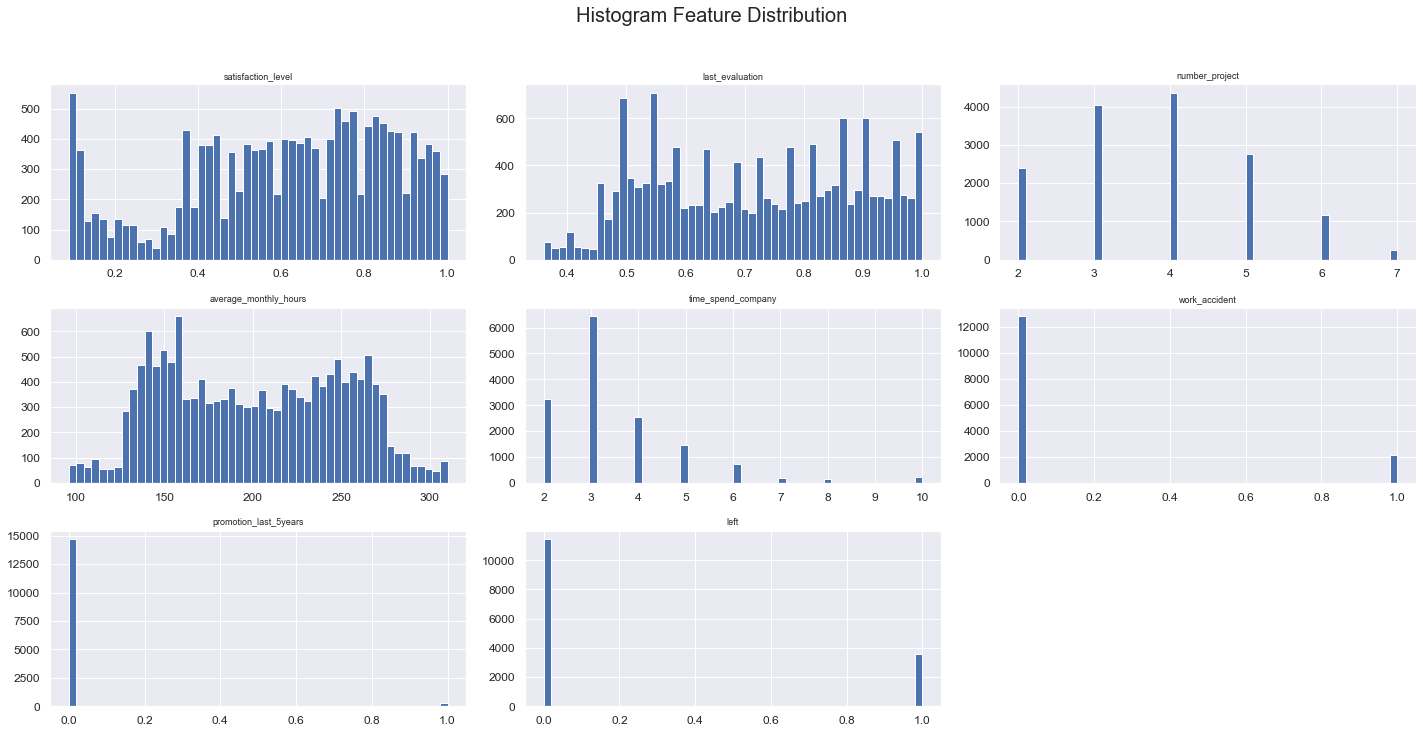

In [9]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

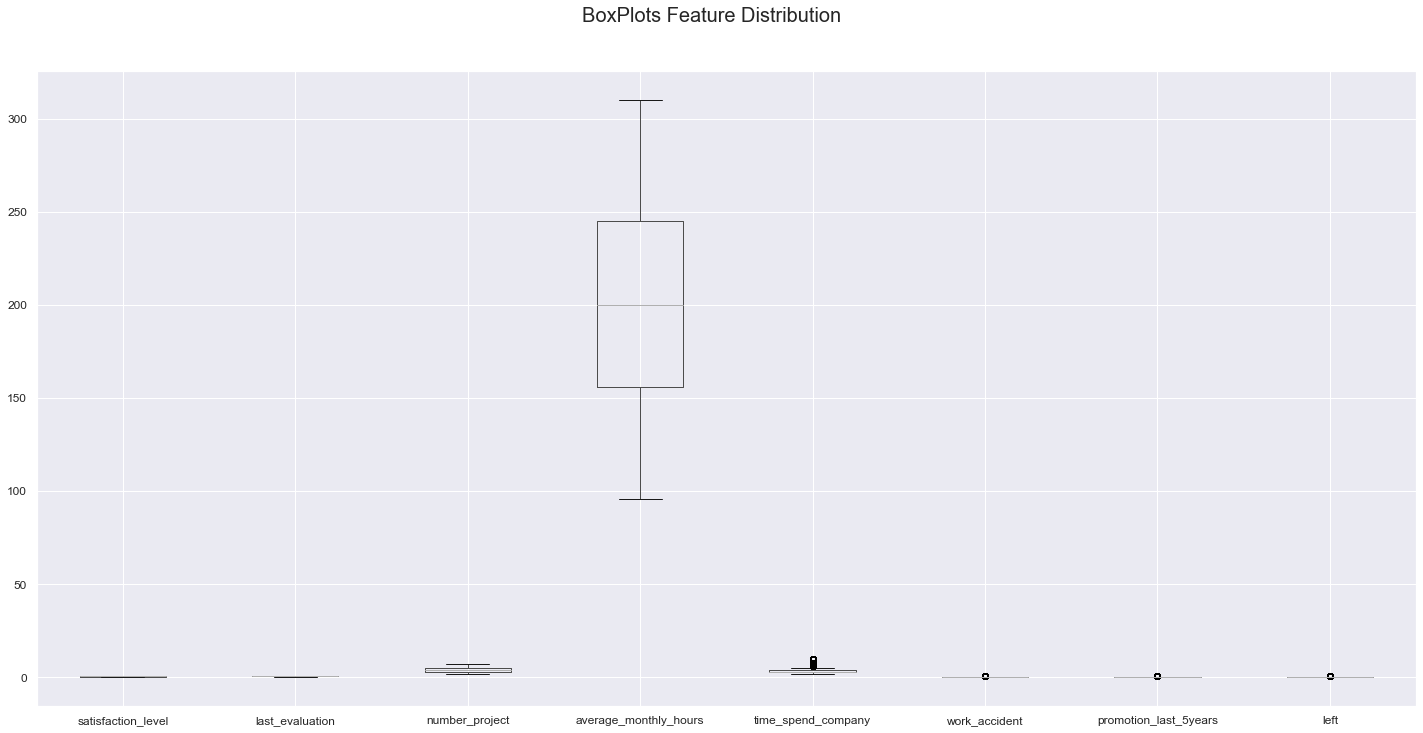

In [10]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

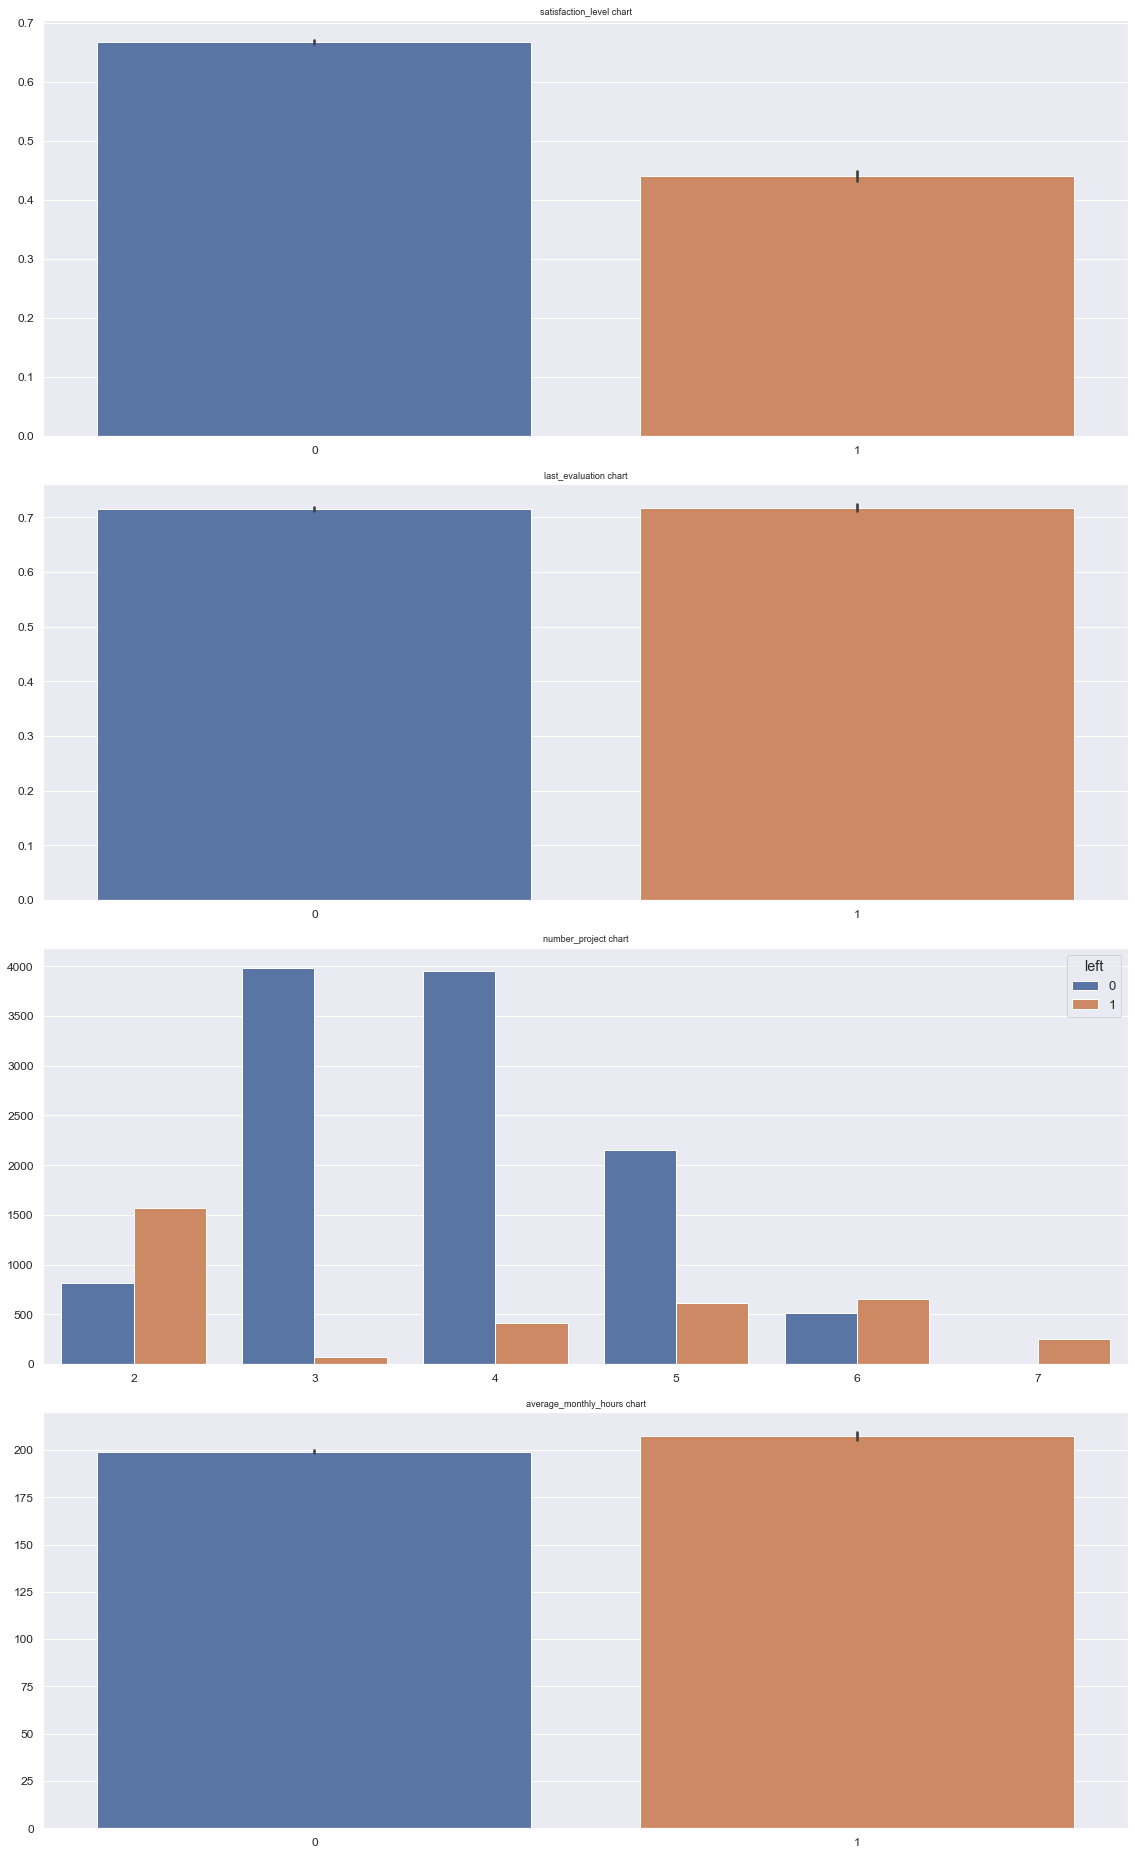

In [11]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,26))
#fig.suptitle('Main Title')


sns.barplot(x='left', y="satisfaction_level", data=df, ax=ax[0])
ax[0].set_title('satisfaction_level chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.barplot(x="left", y="last_evaluation", data=df, ax=ax[1])
ax[1].set_title('last_evaluation chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.countplot(x="number_project", hue="left", data=df, ax=ax[2])
ax[2].set_title('number_project chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("")
ax[2].set_ylabel("")

sns.barplot(x="left", y="average_monthly_hours", data=df, ax=ax[3])
ax[3].set_title('average_monthly_hours chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("")
ax[3].set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

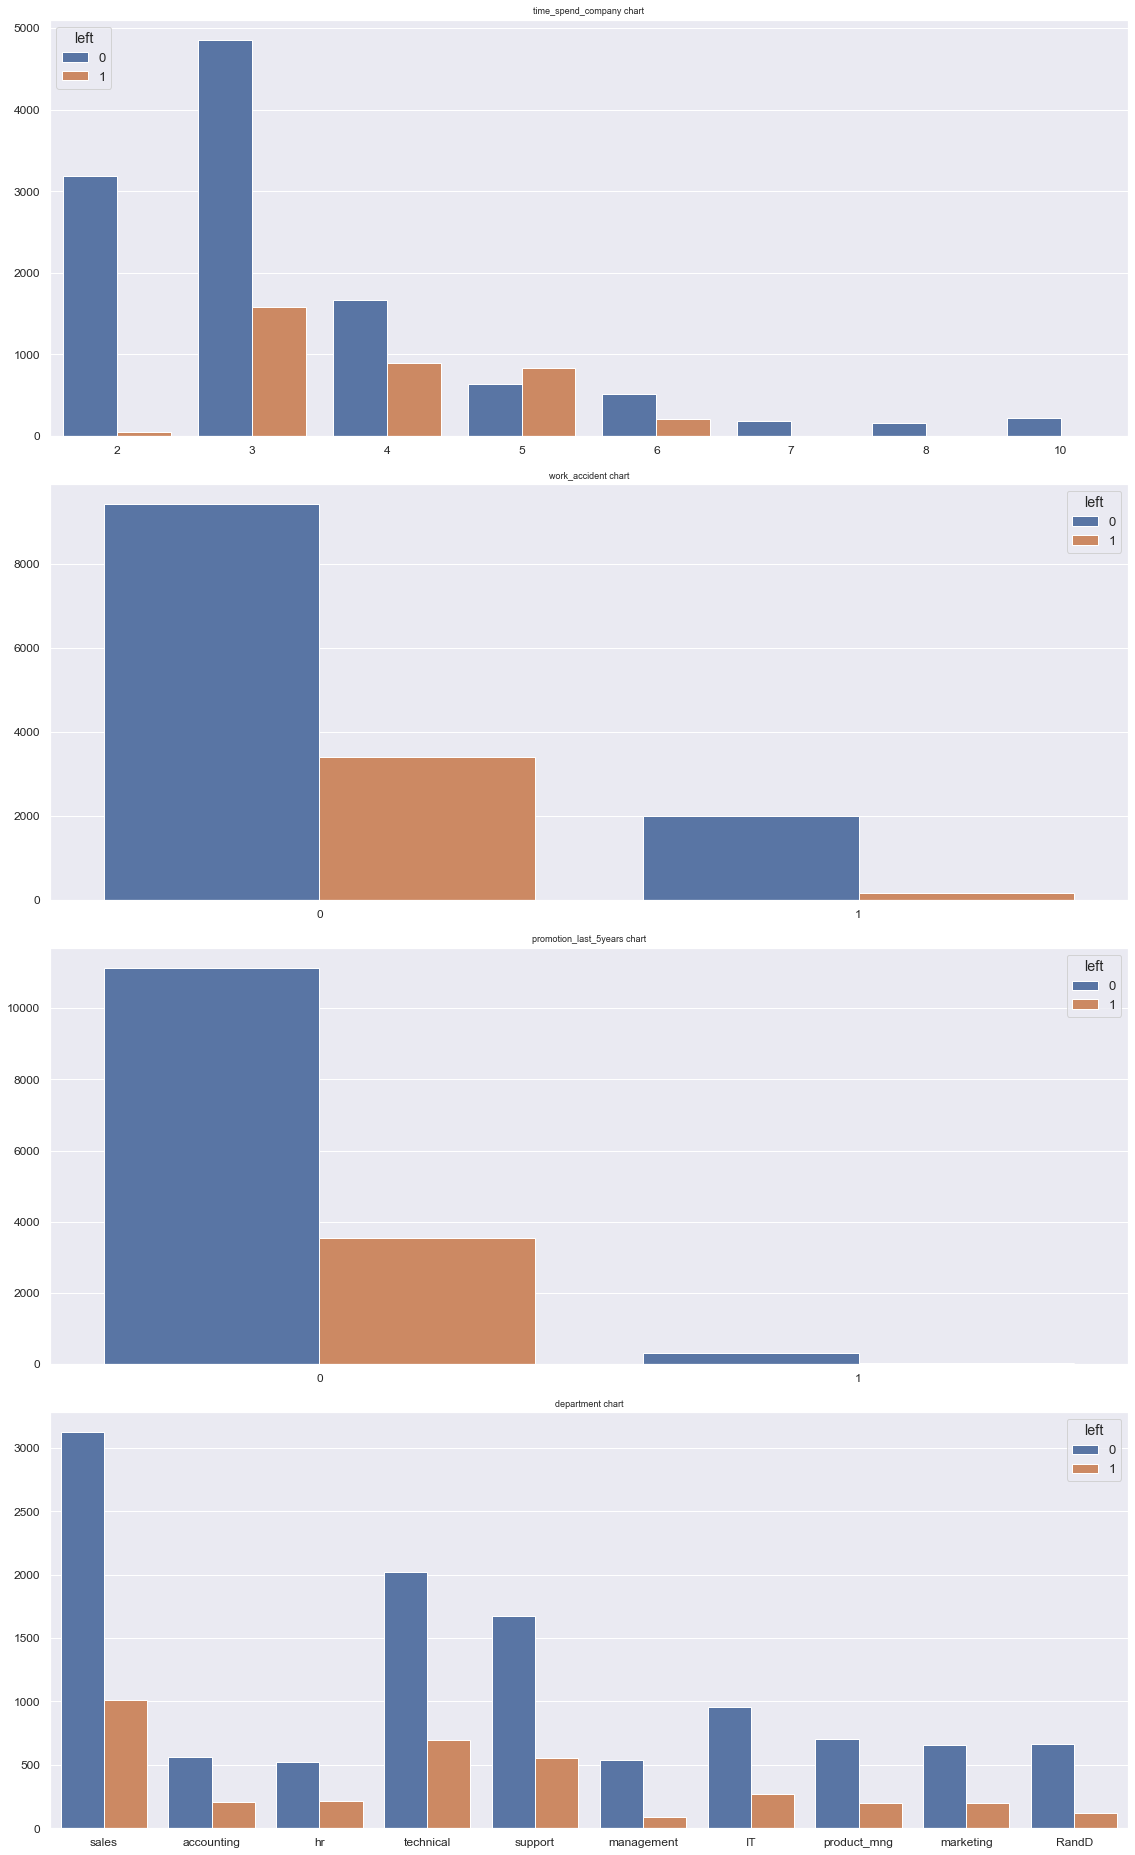

In [12]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,26))
#fig.suptitle('Main Title')


sns.countplot(hue='left', x="time_spend_company", data=df, ax=ax[0])
ax[0].set_title('time_spend_company chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.countplot(x="work_accident", hue="left", data=df, ax=ax[1])
ax[1].set_title('work_accident chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.countplot(hue="left", x="promotion_last_5years", data=df, ax=ax[2])
ax[2].set_title('promotion_last_5years chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("")
ax[2].set_ylabel("")

sns.countplot(hue="left", x="department", data=df, ax=ax[3])
ax[3].set_title('department chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("")
ax[3].set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

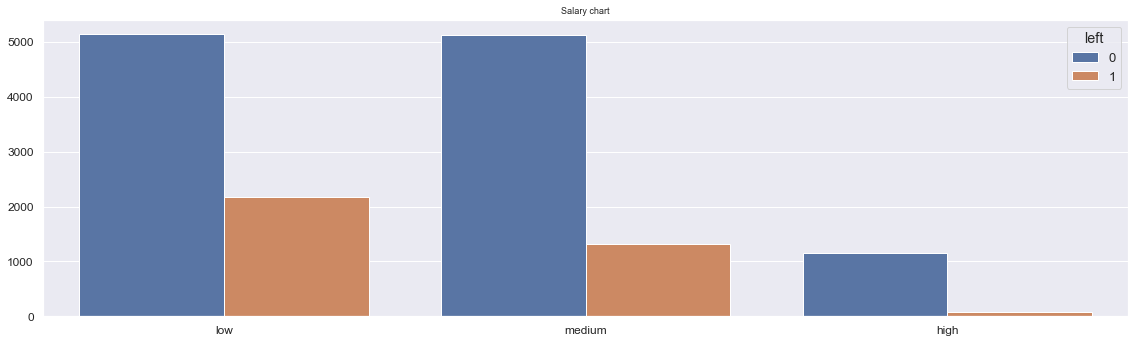

In [13]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,1, sharex=False, figsize=(16,5))
#fig.suptitle('Main Title')

sns.countplot(x='salary', data=df, hue="left")
ax.set_title('Salary chart')
#ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

### Correlation

In [14]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,left
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,0.03,-0.39
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,-0.01,0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,-0.01,0.02
average_monthly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,-0.00,0.07
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.07,0.14
work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,0.04,-0.15
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,1.00,-0.06
left,-0.39,0.01,0.02,0.07,0.14,-0.15,-0.06,1.00


In [15]:
df.corr()["left"].sort_values()

satisfaction_level      -0.39
work_accident           -0.15
promotion_last_5years   -0.06
last_evaluation          0.01
number_project           0.02
average_monthly_hours    0.07
time_spend_company       0.14
left                     1.00
Name: left, dtype: float64

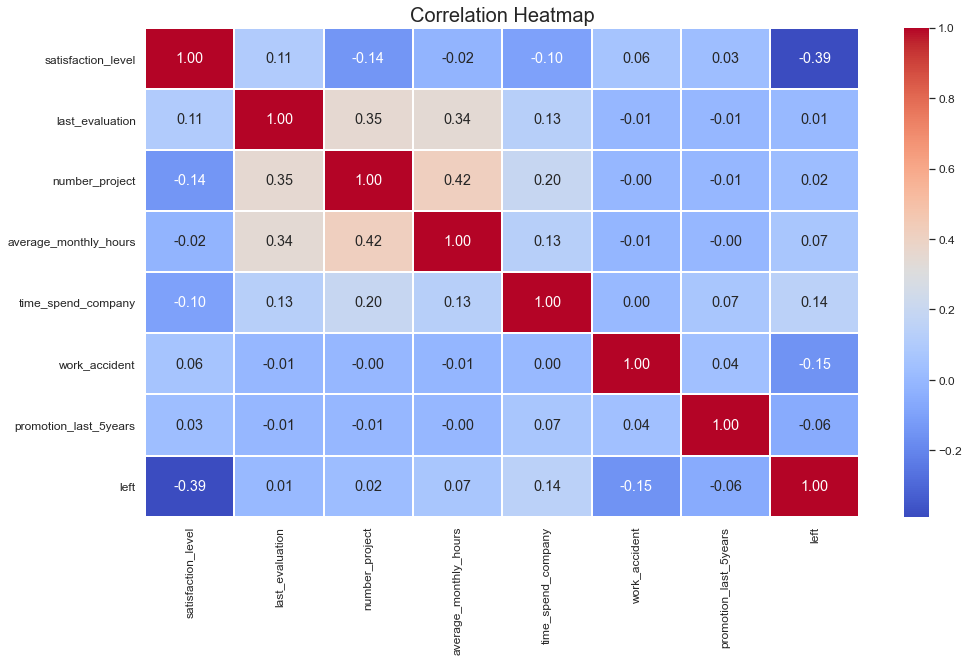

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

## Data Preprocessing

### Feature Engineering

In [17]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


### Treat Missing Values

In [18]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

### Treat Duplicate Values

In [19]:
df.duplicated(keep='first').sum()

3008

In [21]:
df[df.duplicated(keep=False)].head() #Check duplicate values

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [23]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [24]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


### Type Change

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   department             11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   left                   11991 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [26]:
df["work_accident"] = df["work_accident"].astype('object')

In [27]:
df["promotion_last_5years"] = df["promotion_last_5years"].astype('object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  object 
 6   promotion_last_5years  11991 non-null  object 
 7   department             11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   left                   11991 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 936.9+ KB


### One-hot encoding

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  object 
 6   promotion_last_5years  11991 non-null  object 
 7   department             11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   left                   11991 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 936.9+ KB


In [30]:
df2 = pd.get_dummies(data=df, drop_first=True)

In [31]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,left,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [32]:
list(df2.columns.values)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'left',
 'work_accident_1',
 'promotion_last_5years_1',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical',
 'salary_low',
 'salary_medium']

In [33]:
df2 = df2[['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident_1',
 'promotion_last_5years_1',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical',
 'salary_low',
 'salary_medium',
 'left']]

In [35]:
df2

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,0,0,0,1,0,0,0,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,1,0,0,0,1,0,0,0,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,1,0,0,0,1,0,0,0,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,1,0,0,0,0,1,0,0,0,0,0,0,0


### Save to CSV

In [36]:
#df2.to_csv("HR.csv", index=False)

### Create Train, Validation and Test Dataset

In [37]:
df2.shape

(11991, 19)

In [40]:
trainset = df2[0:10000]

In [41]:
trainset

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.75,0.63,3,148,4,0,0,0,0,0,0,0,0,0,0,1,0,1,0
9996,0.72,0.74,2,238,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9997,0.68,0.51,3,185,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9998,0.13,0.77,4,201,5,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [42]:
testset = df2[10000:]

In [43]:
testset

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
10000,0.71,0.72,4,137,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0
10001,0.85,0.66,5,189,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0
10002,0.87,0.91,3,229,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0
10003,0.86,0.93,3,199,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0
10004,0.49,0.85,3,250,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,0,0,0,1,0,0,0,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,1,0,0,0,1,0,0,0,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,1,0,0,0,1,0,0,0,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
#trainset.to_csv("train.csv", index=False)

In [45]:
#testset.to_csv("test.csv", index=False)

In [46]:
testset.drop(['left'], axis=1, inplace=True)

In [47]:
testset.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
10000,0.71,0.72,4,137,3,0,0,0,0,0,0,0,0,1,0,0,0,1
10001,0.85,0.66,5,189,3,0,0,0,0,0,0,0,0,1,0,0,0,1
10002,0.87,0.91,3,229,3,1,0,0,0,0,0,0,0,1,0,0,0,1
10003,0.86,0.93,3,199,3,1,0,0,0,0,0,0,0,1,0,0,0,1
10004,0.49,0.85,3,250,2,0,0,0,0,0,0,0,0,1,0,0,0,1


In [48]:
#testset.to_csv("test2.csv", index=False)

## Regression Analysis

## Logistic Regression (StatsModel)

In [49]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident_1', 'promotion_last_5years_1', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_low', 'salary_medium', 'left'], dtype='object')

In [50]:
y = df2[['left']]
X = df2[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 
       'work_accident_1', 'promotion_last_5years_1', 'department_RandD', 'department_accounting', 'department_hr', 
       'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 
       'department_support', 'department_technical', 'salary_low', 'salary_medium']]

In [51]:
X = sm.add_constant(X)

In [52]:
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.357914
         Iterations 8


In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                11991
Model:                          Logit   Df Residuals:                    11972
Method:                           MLE   Df Model:                           18
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:                  0.2038
Time:                        15:50:24   Log-Likelihood:                -4291.8
converged:                       True   LL-Null:                       -5390.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.1059      0.244     -8.647      0.000      -2.583      -1.629
satisfaction_level         -4.0088      0.121    -33.075      0.000      -4.246      -3.771
last_evaluation             0.6054      0.180      3.360      0.001       0.252       0.959
number_project             -0.2858      0.026    -11.031      0.000      -0.337      -0.235
average_monthly_hours       0.0042      0.001      6.688      0.000       0.003       0.005
time_spend_company          0.3082      0.020     15.241      0.000       0.269       0.348
work_accident_1            -1.4376      0.111    -12.960      0.000      -1.655      -1.220
promotion_last_5years_1    -1.4601      0.384     -3.799      0.000      -2.213      -0.707
department_RandD           -0.3362      0.160     -2.098      0.036      -0.650      -0.022
department_accounting       0.0159      0.153      0.104      0.917      -0.284       0.316
department_hr               0.1637      0.151      1.081      0.280      -0.133       0.461
department_management      -0.2058      0.191     -1.077      0.281      -0.580       0.169
department_marketing        0.0659      0.152      0.434      0.664      -0.232       0.364
department_product_mng     -0.0089      0.150     -0.059      0.953      -0.303       0.286
department_sales            0.0718      0.110      0.651      0.515      -0.144       0.288
department_support          0.1425      0.119      1.194      0.232      -0.091       0.376
department_technical        0.1092      0.116      0.945      0.345      -0.117       0.336
salary_low                  1.8320      0.164     11.177      0.000       1.511       2.153
salary_medium               1.3831      0.165      8.394      0.000       1.060       1.706
===========================================================================================
"""

#### Python code done by Dennis Lam